In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

Sub - 01:
[ 0.7456787   6.71110833  8.20246574 14.16789537]


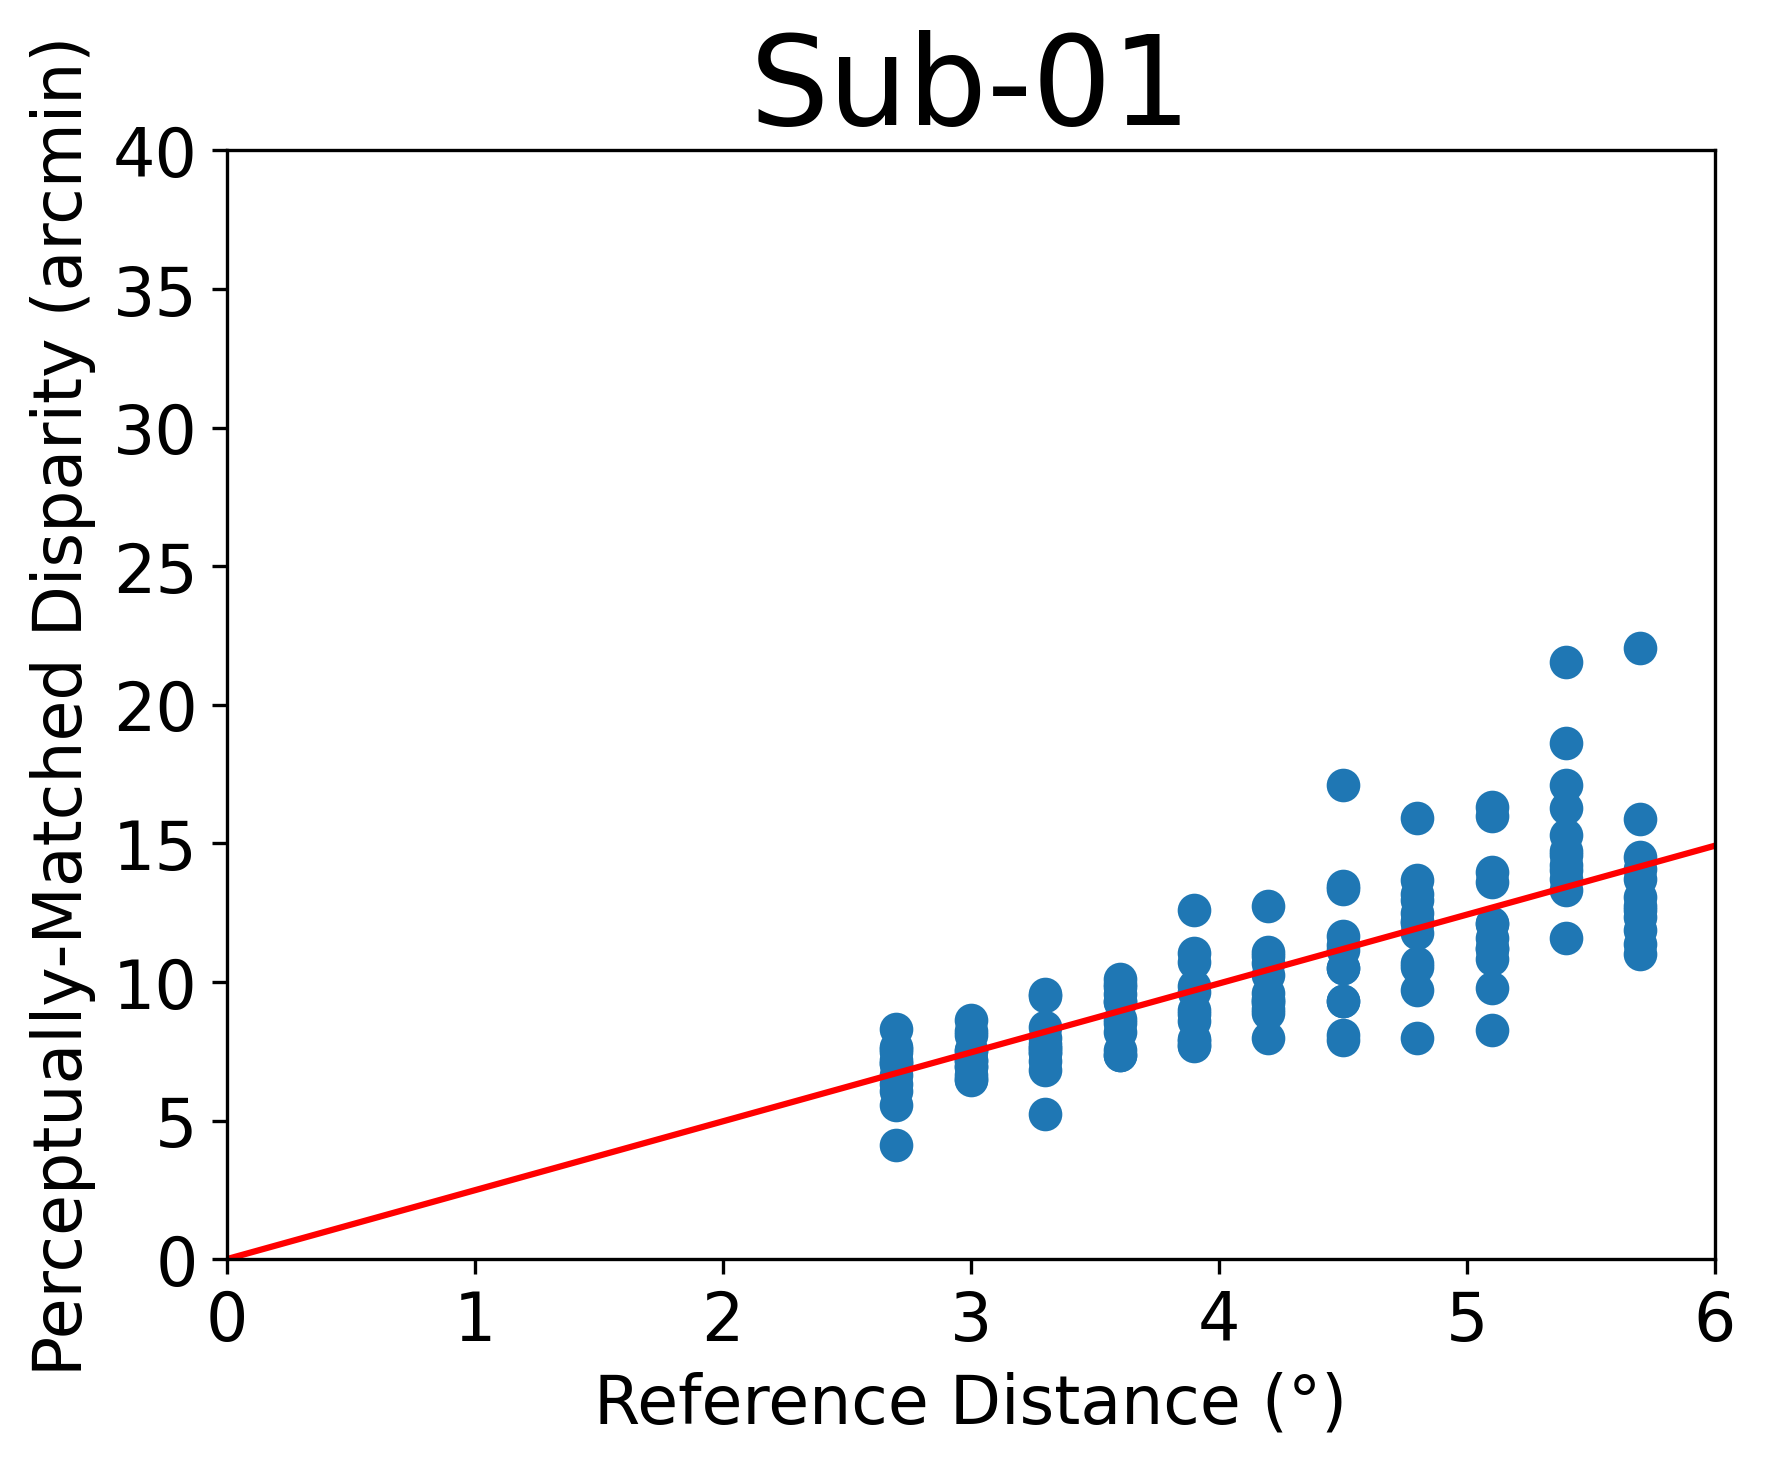

Sub - 02:
[ 0.78742699  7.0868429   8.66169687 14.96111278]


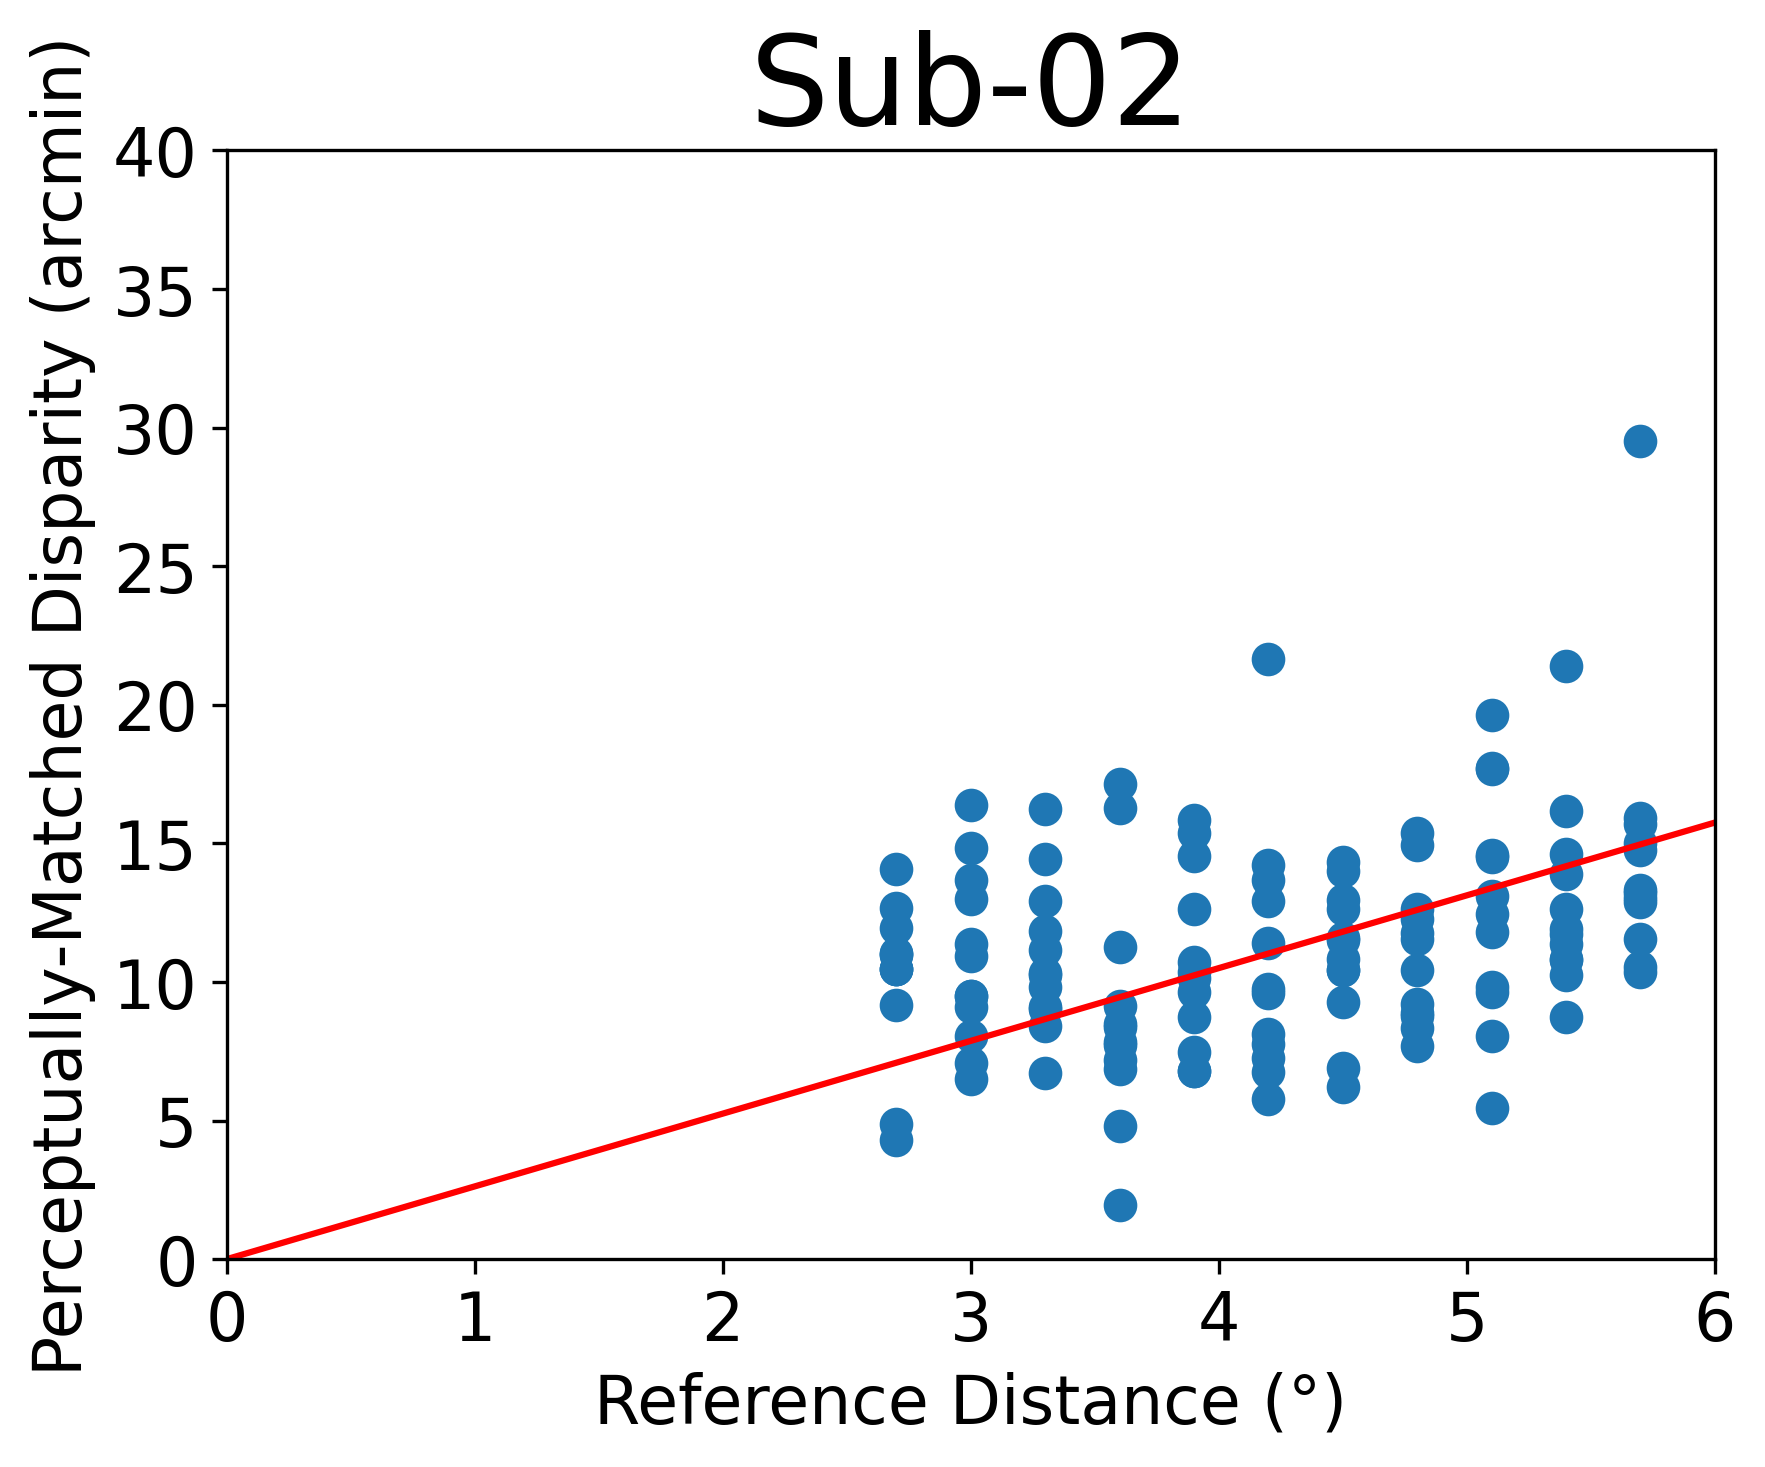

Sub - 03:
[ 1.02995724  9.26961512 11.32952959 19.56918748]


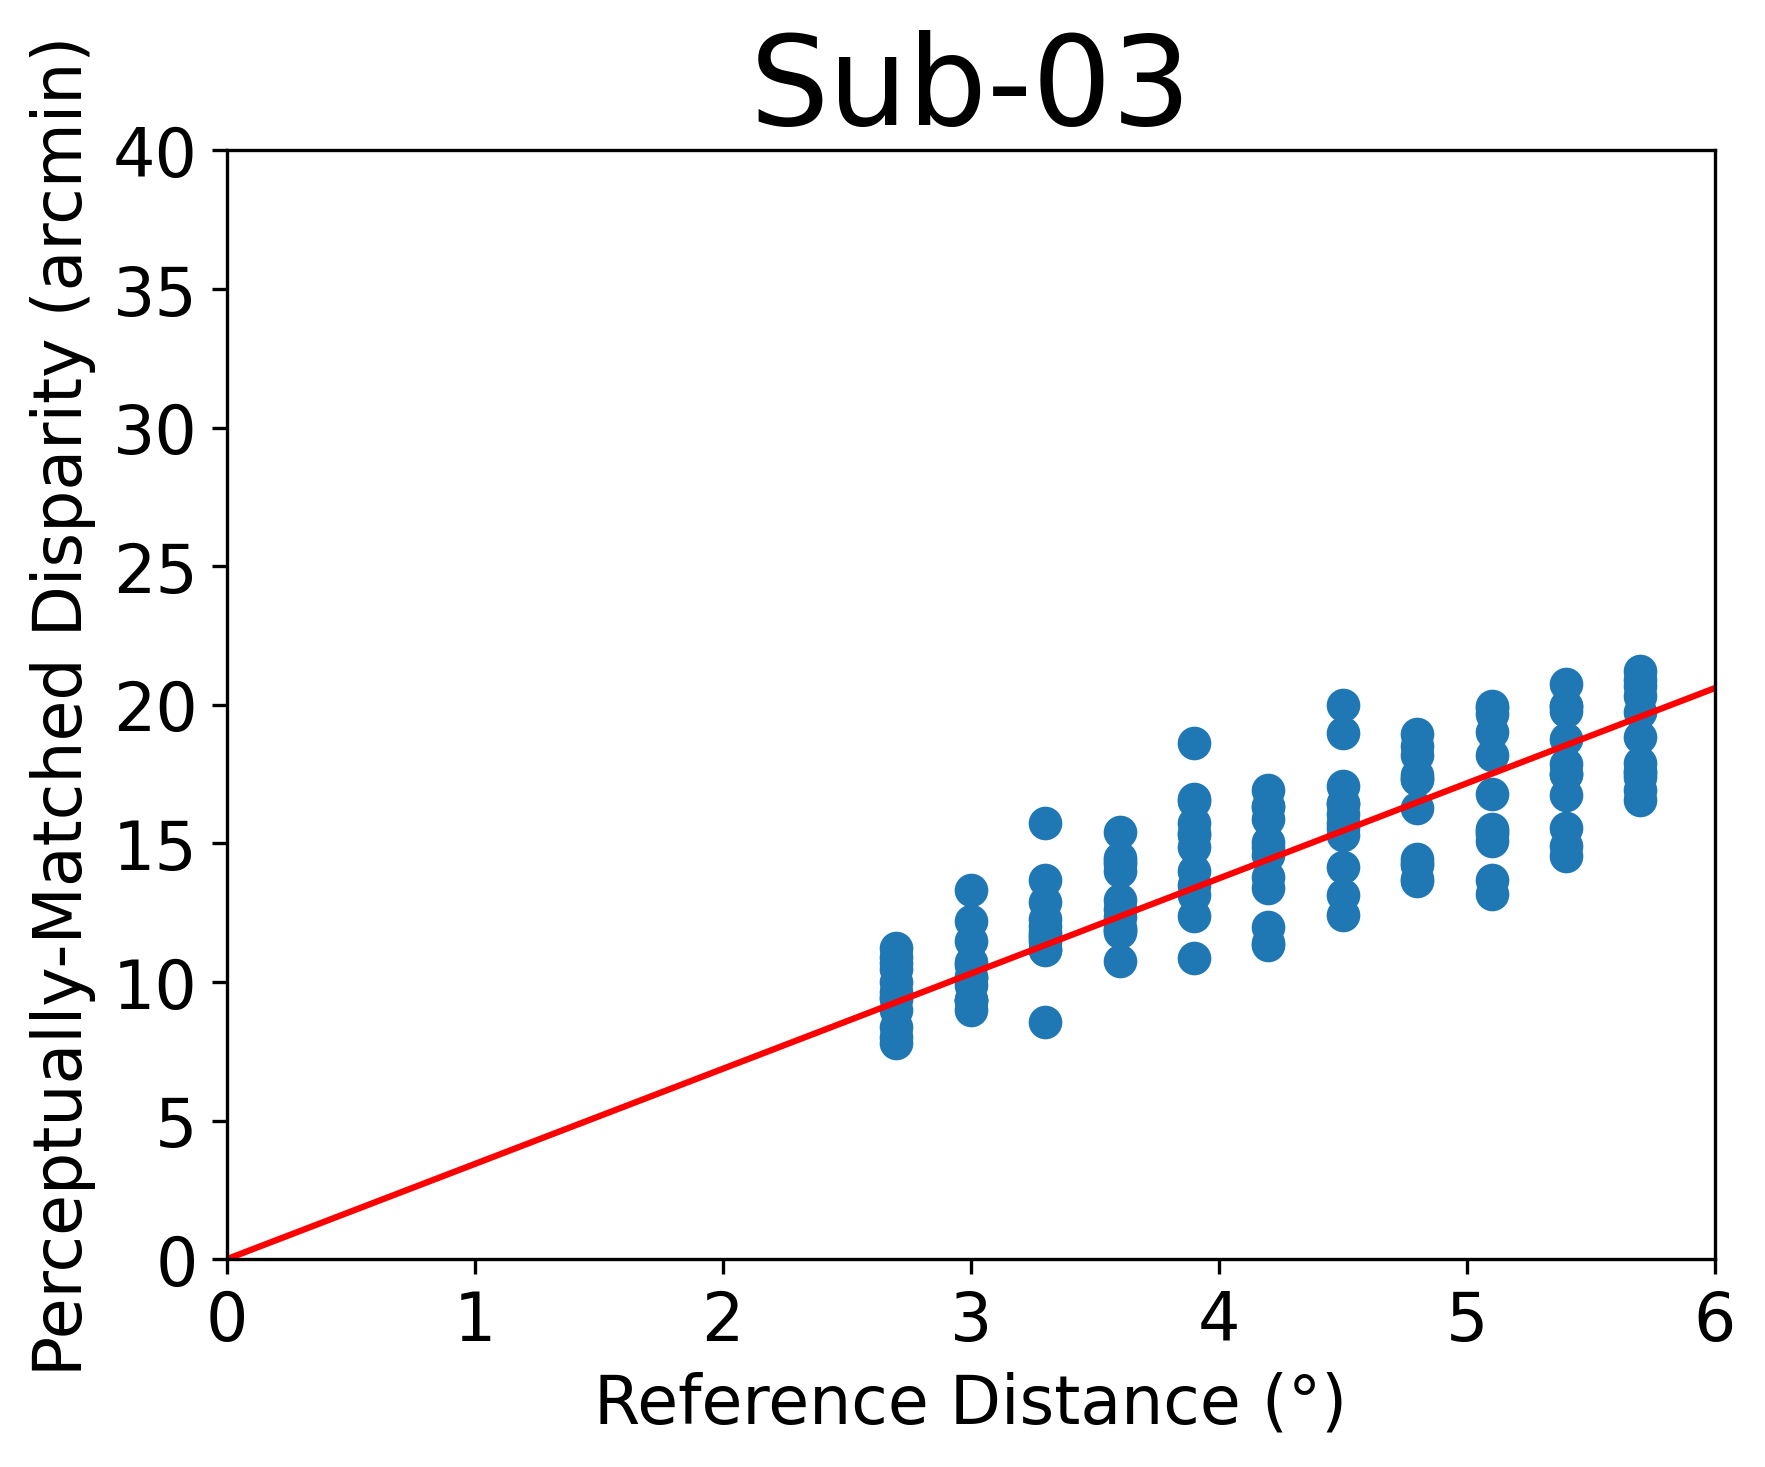

Sub - 04:
[ 0.97114059  8.74026528 10.68254645 18.45167114]


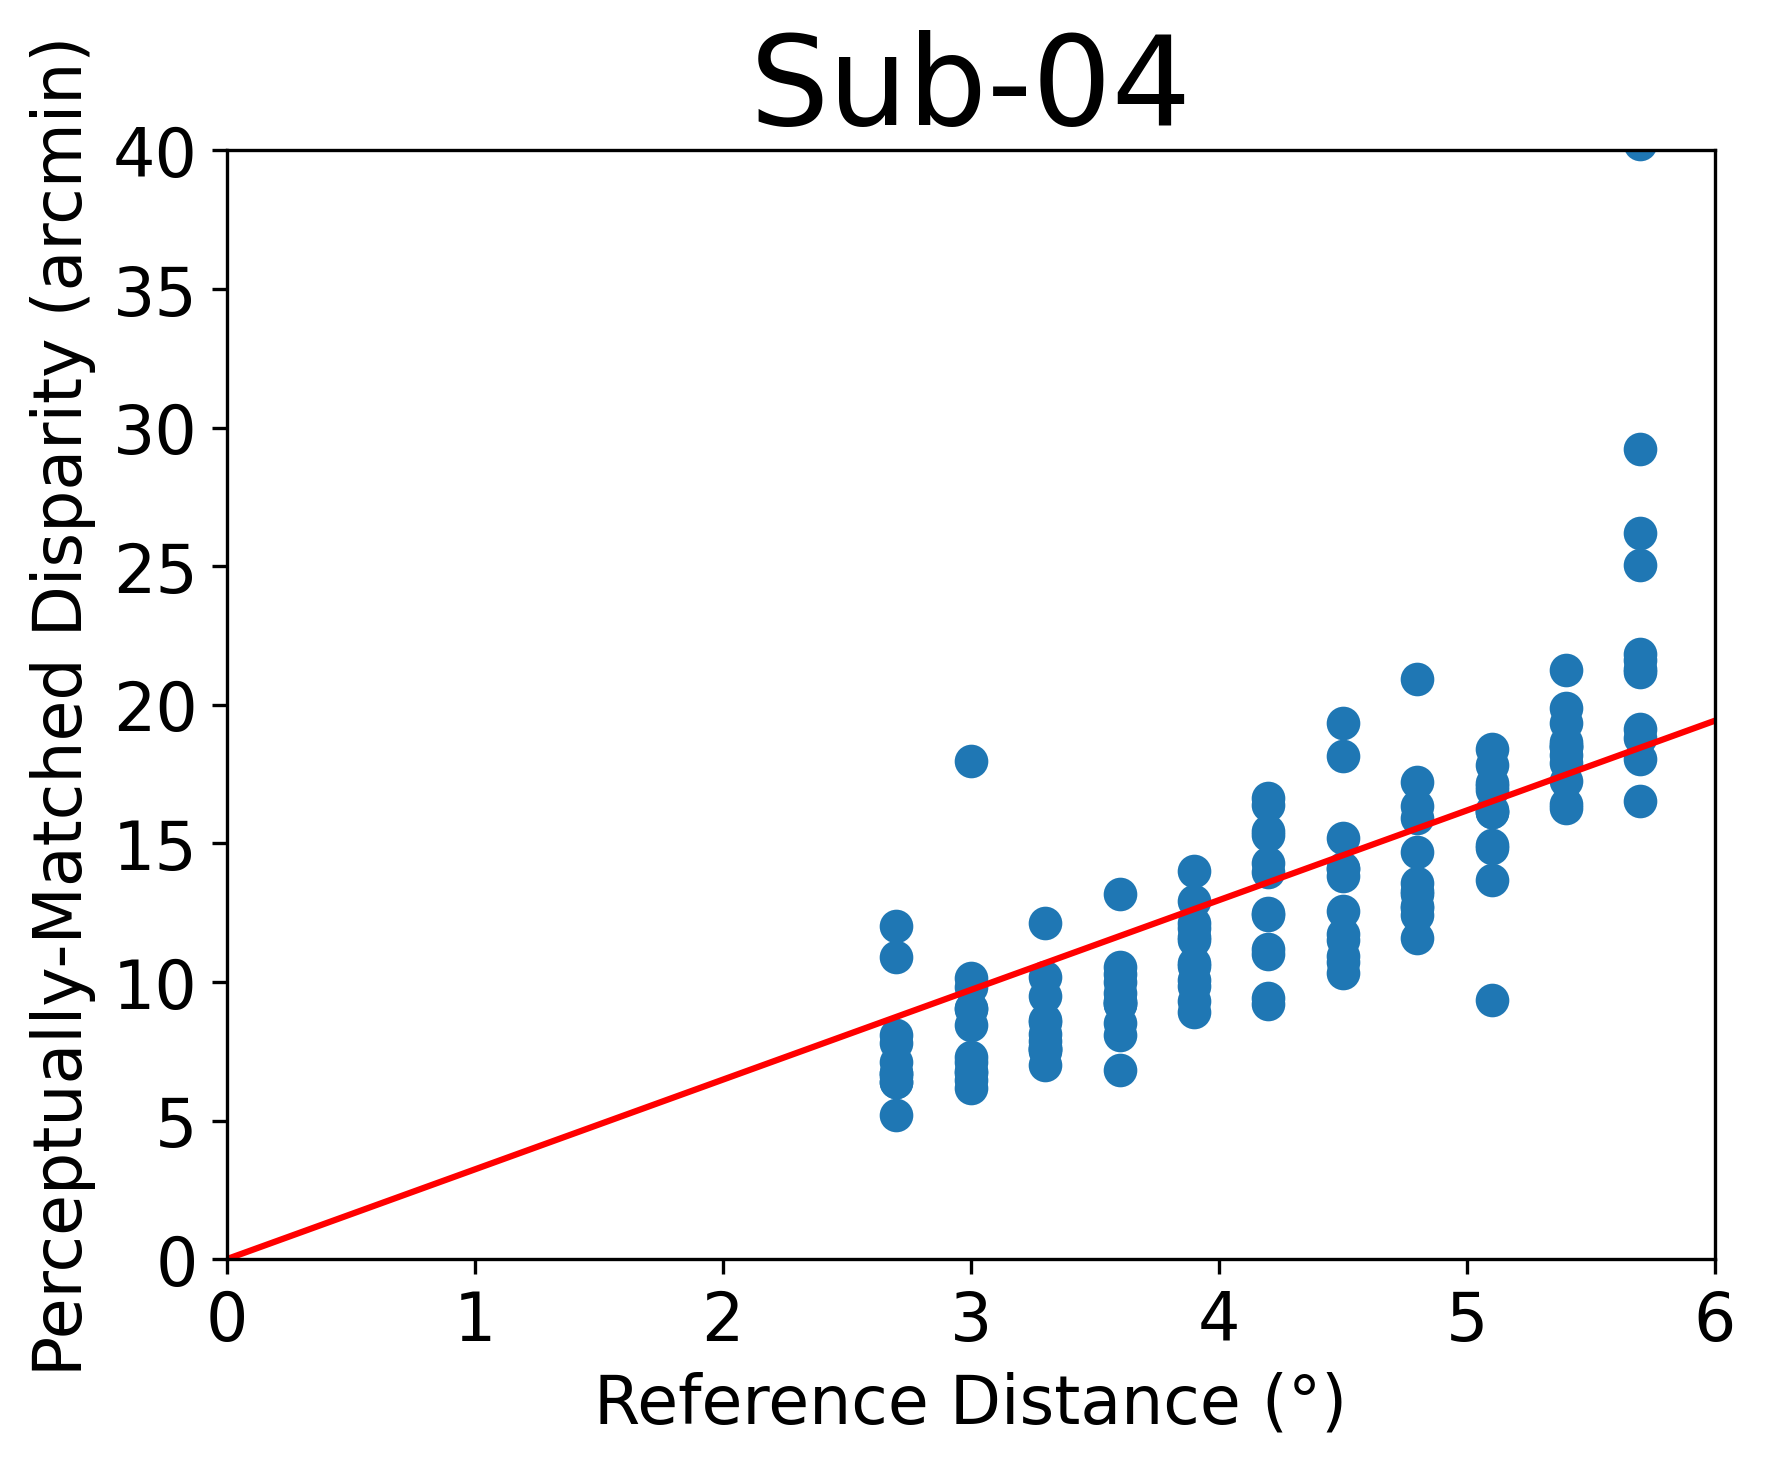

Sub - 05:
[ 0.68474427  6.16269846  7.532187   13.01014119]


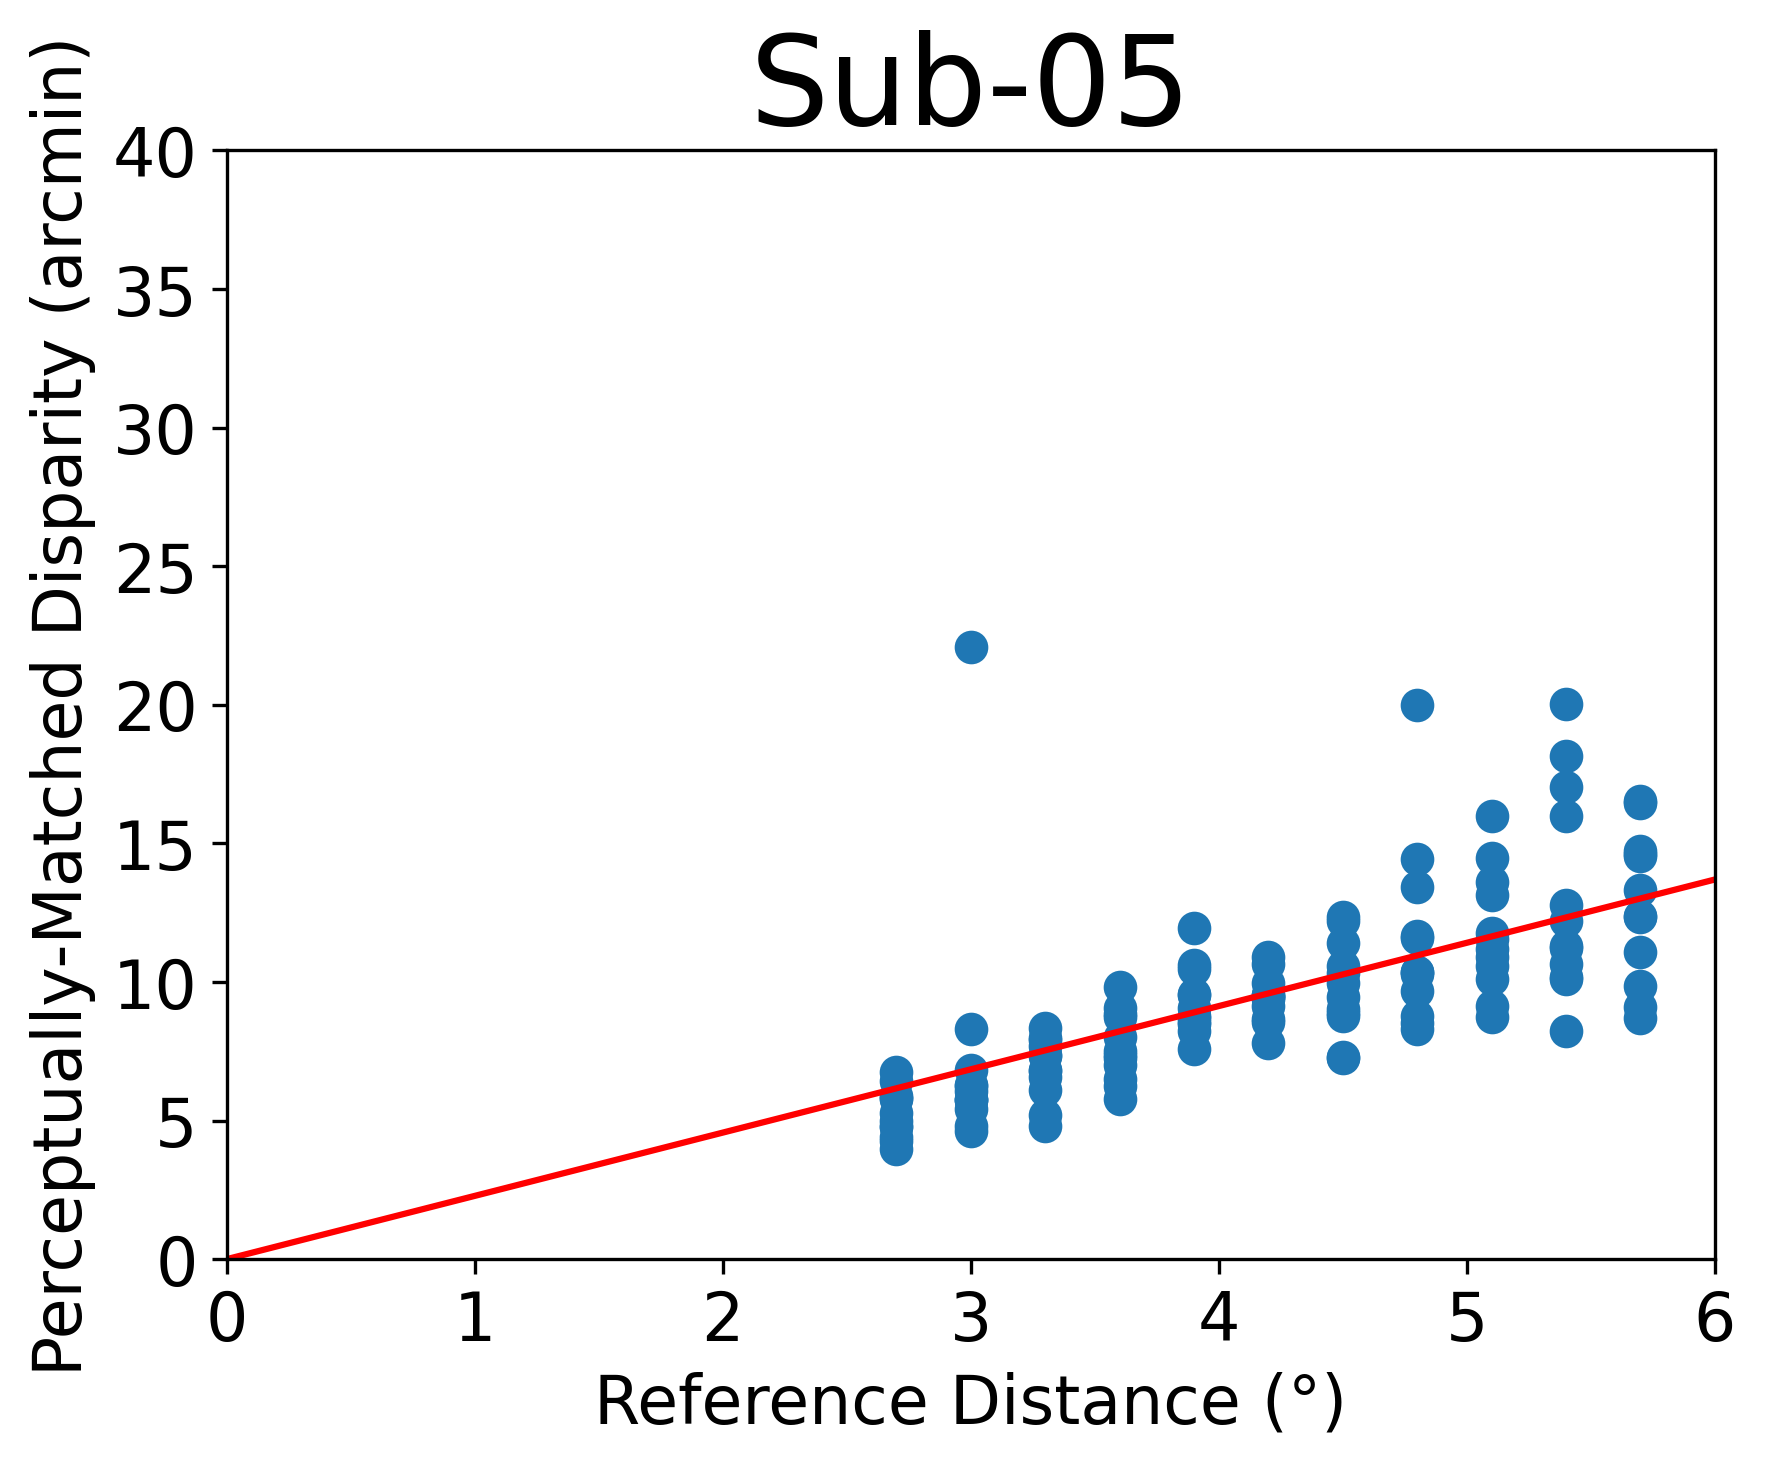

Sub - 06:
[0.49269739 4.43427651 5.41967129 9.36125042]


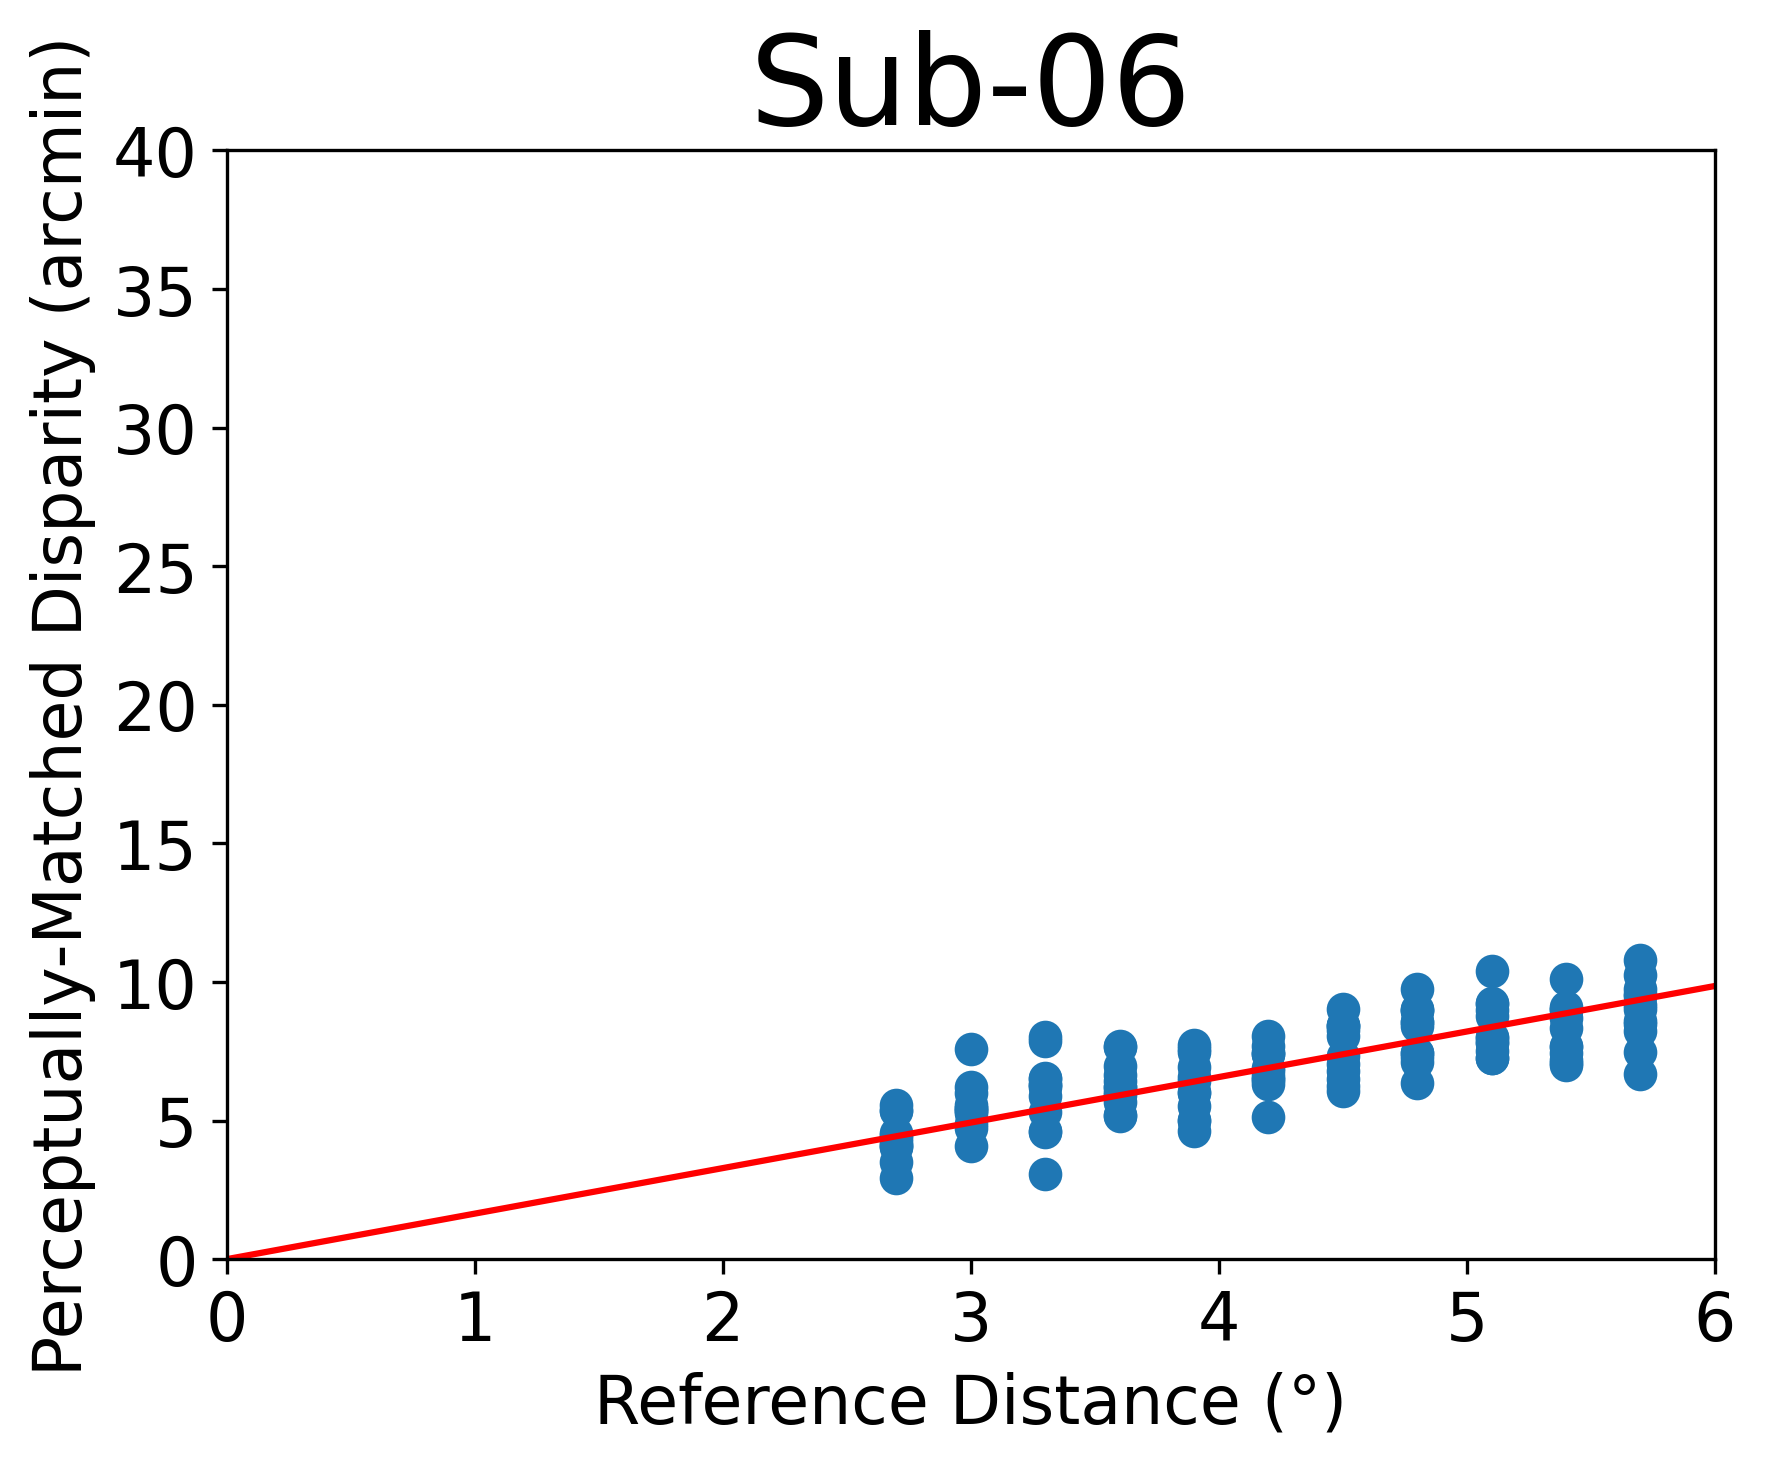

Sub - 07:
[0.46001186 4.14010676 5.06013049 8.74022539]


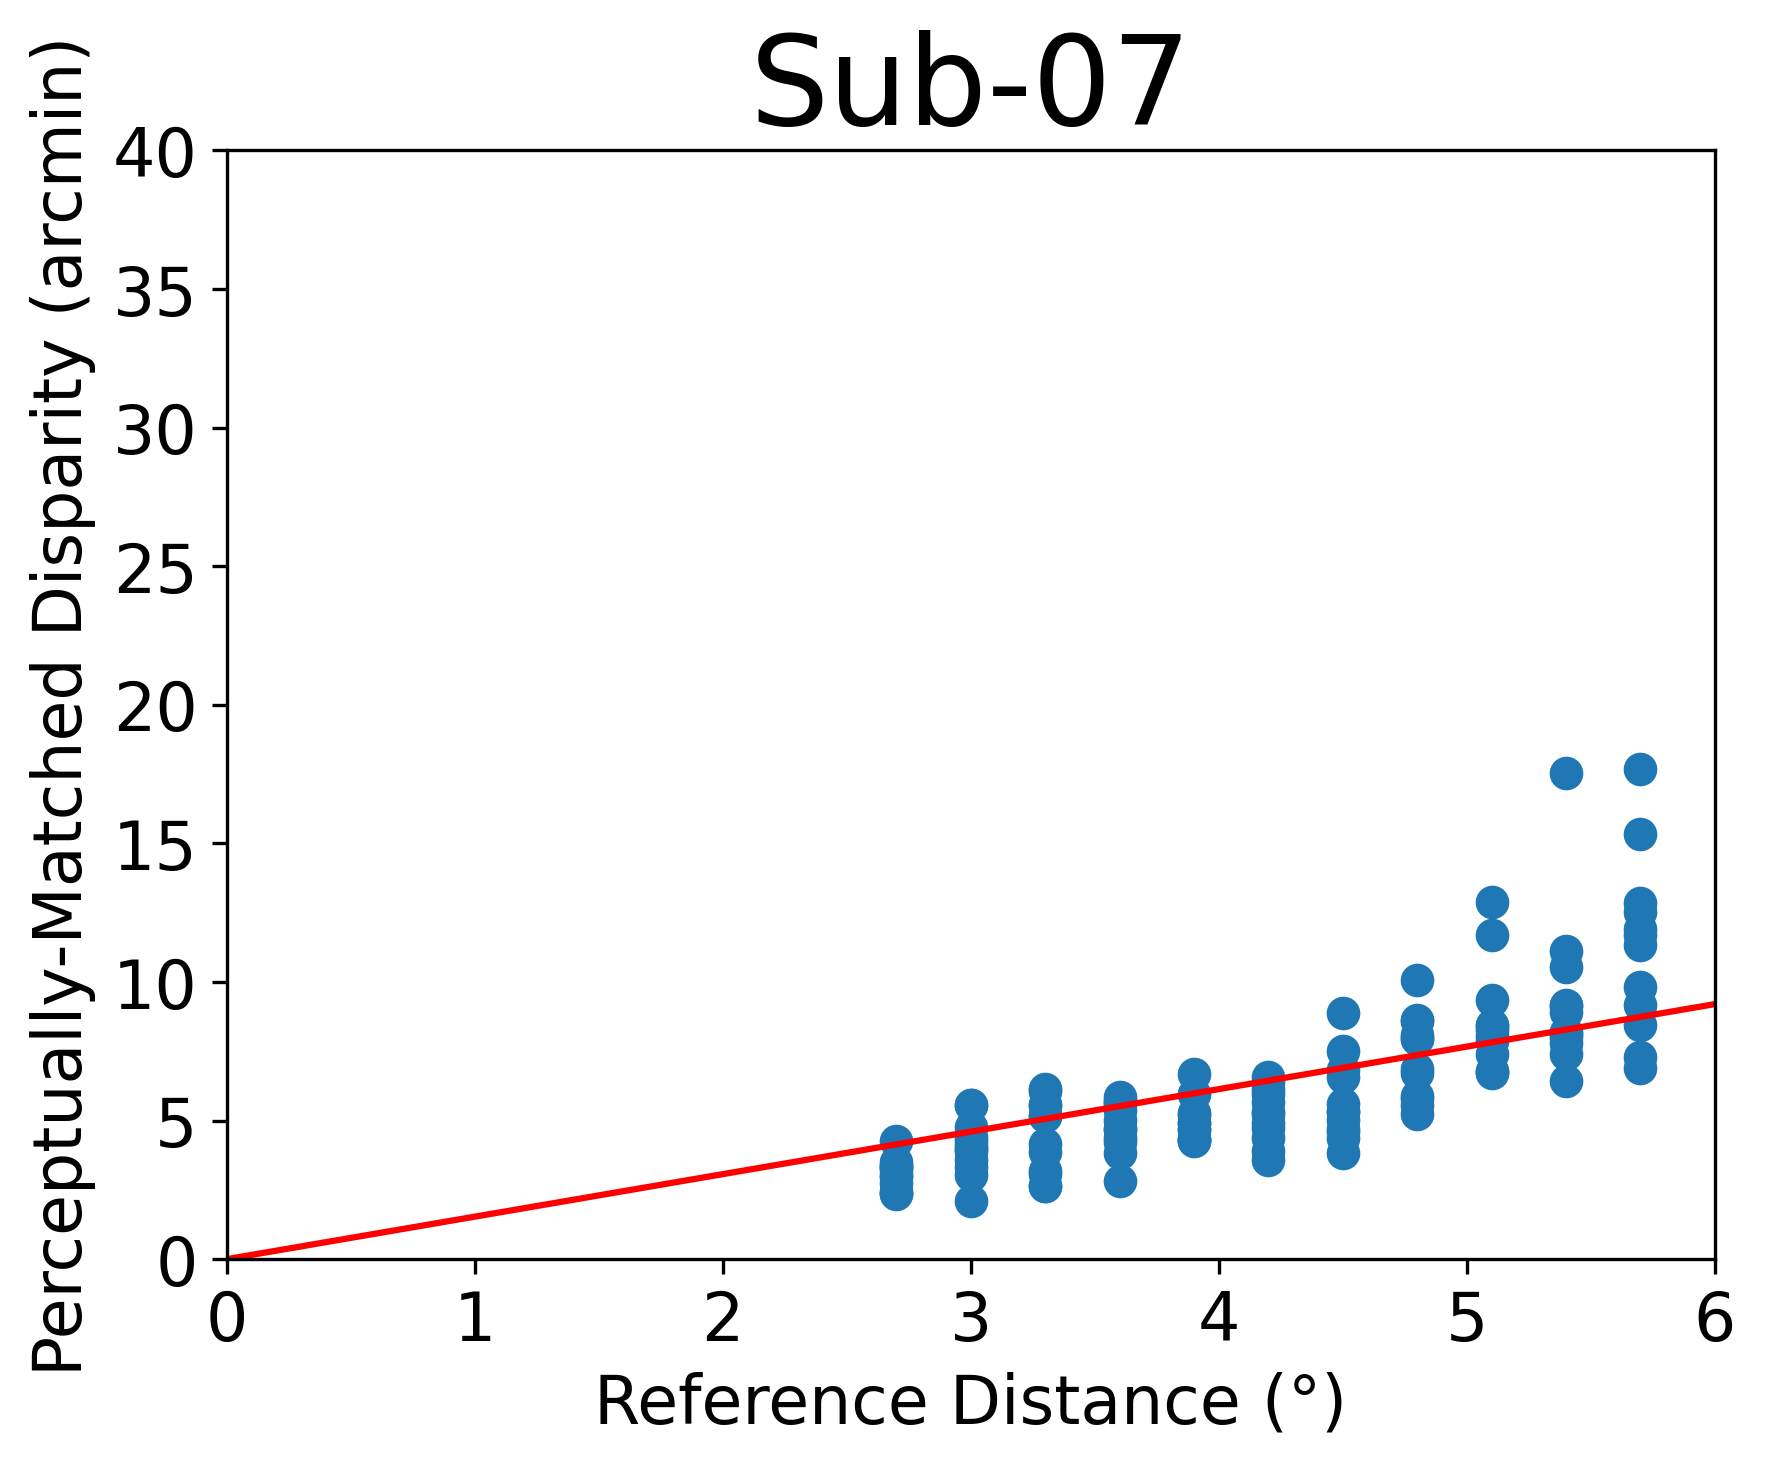

Sub - 08:
[ 0.96637707  8.69739366 10.6301478  18.36116439]


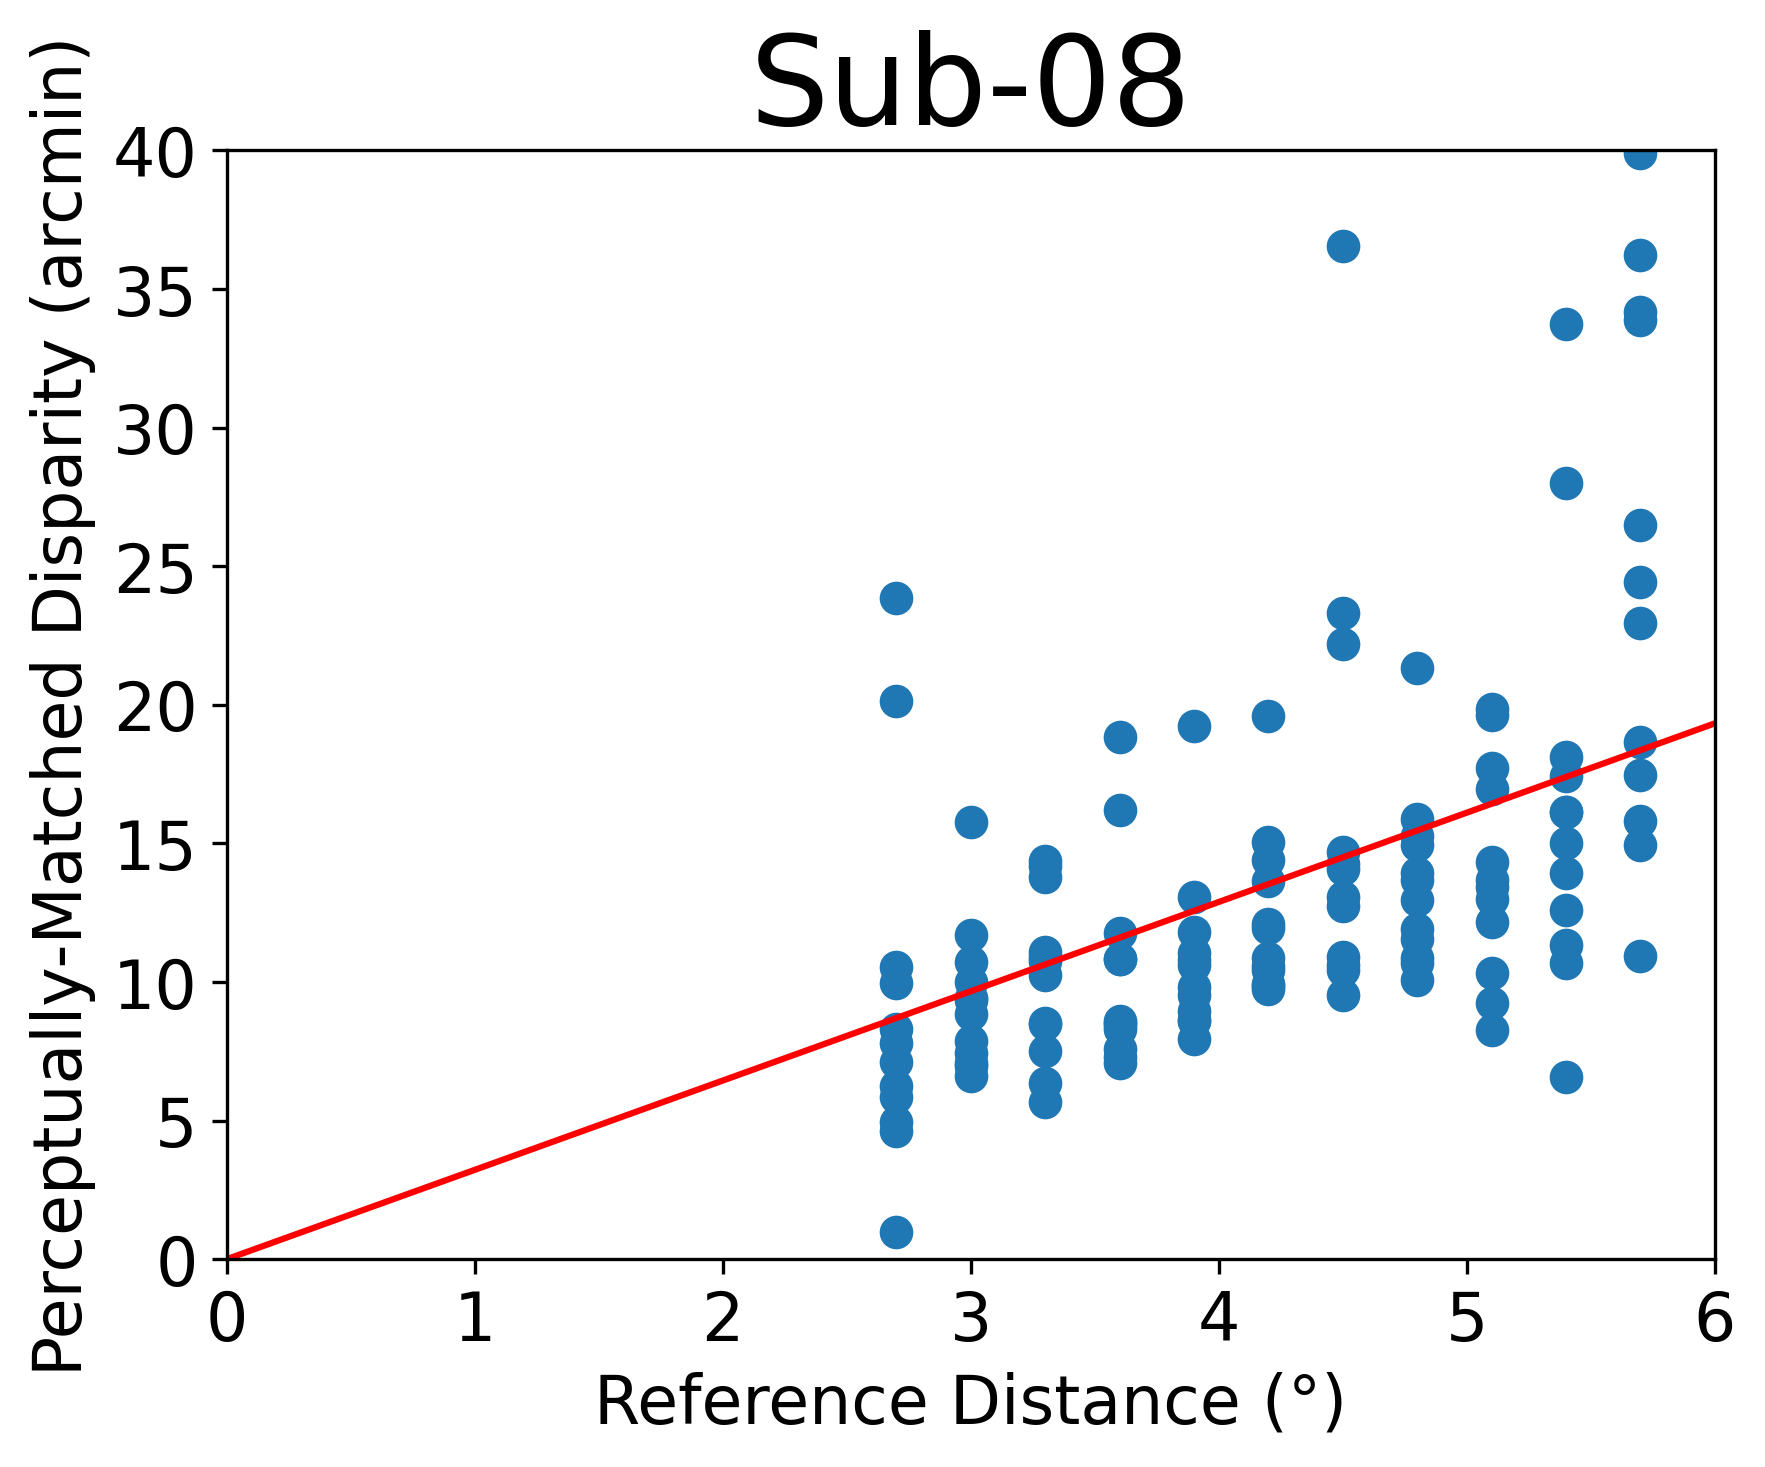

Sub - 09:
[0.42124491 3.79120419 4.63369402 8.0036533 ]


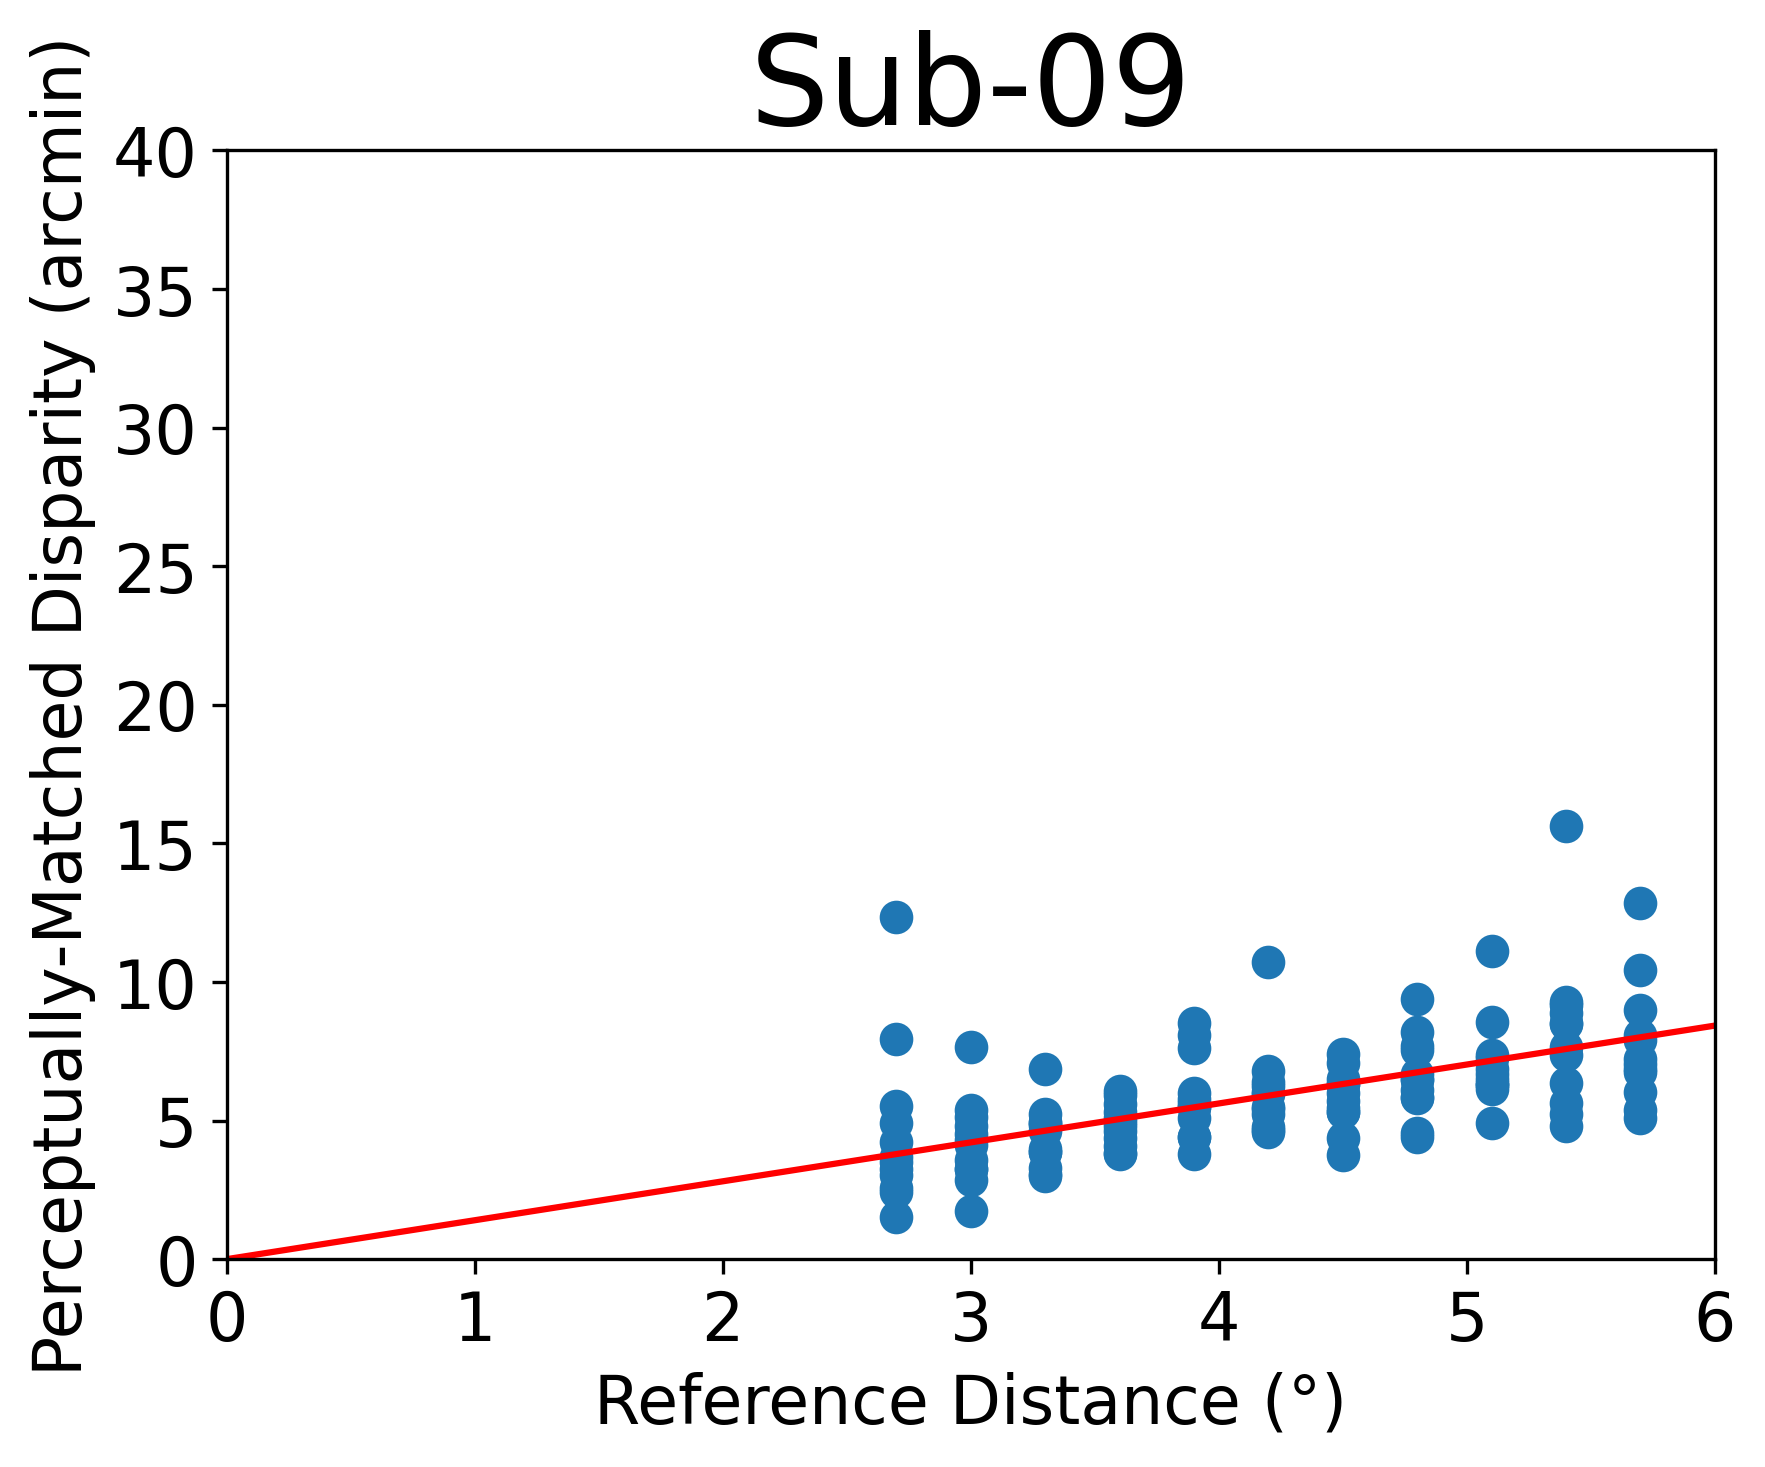

Sub - 11:
[ 1.13662601 10.22963407 12.50288609 21.59589415]


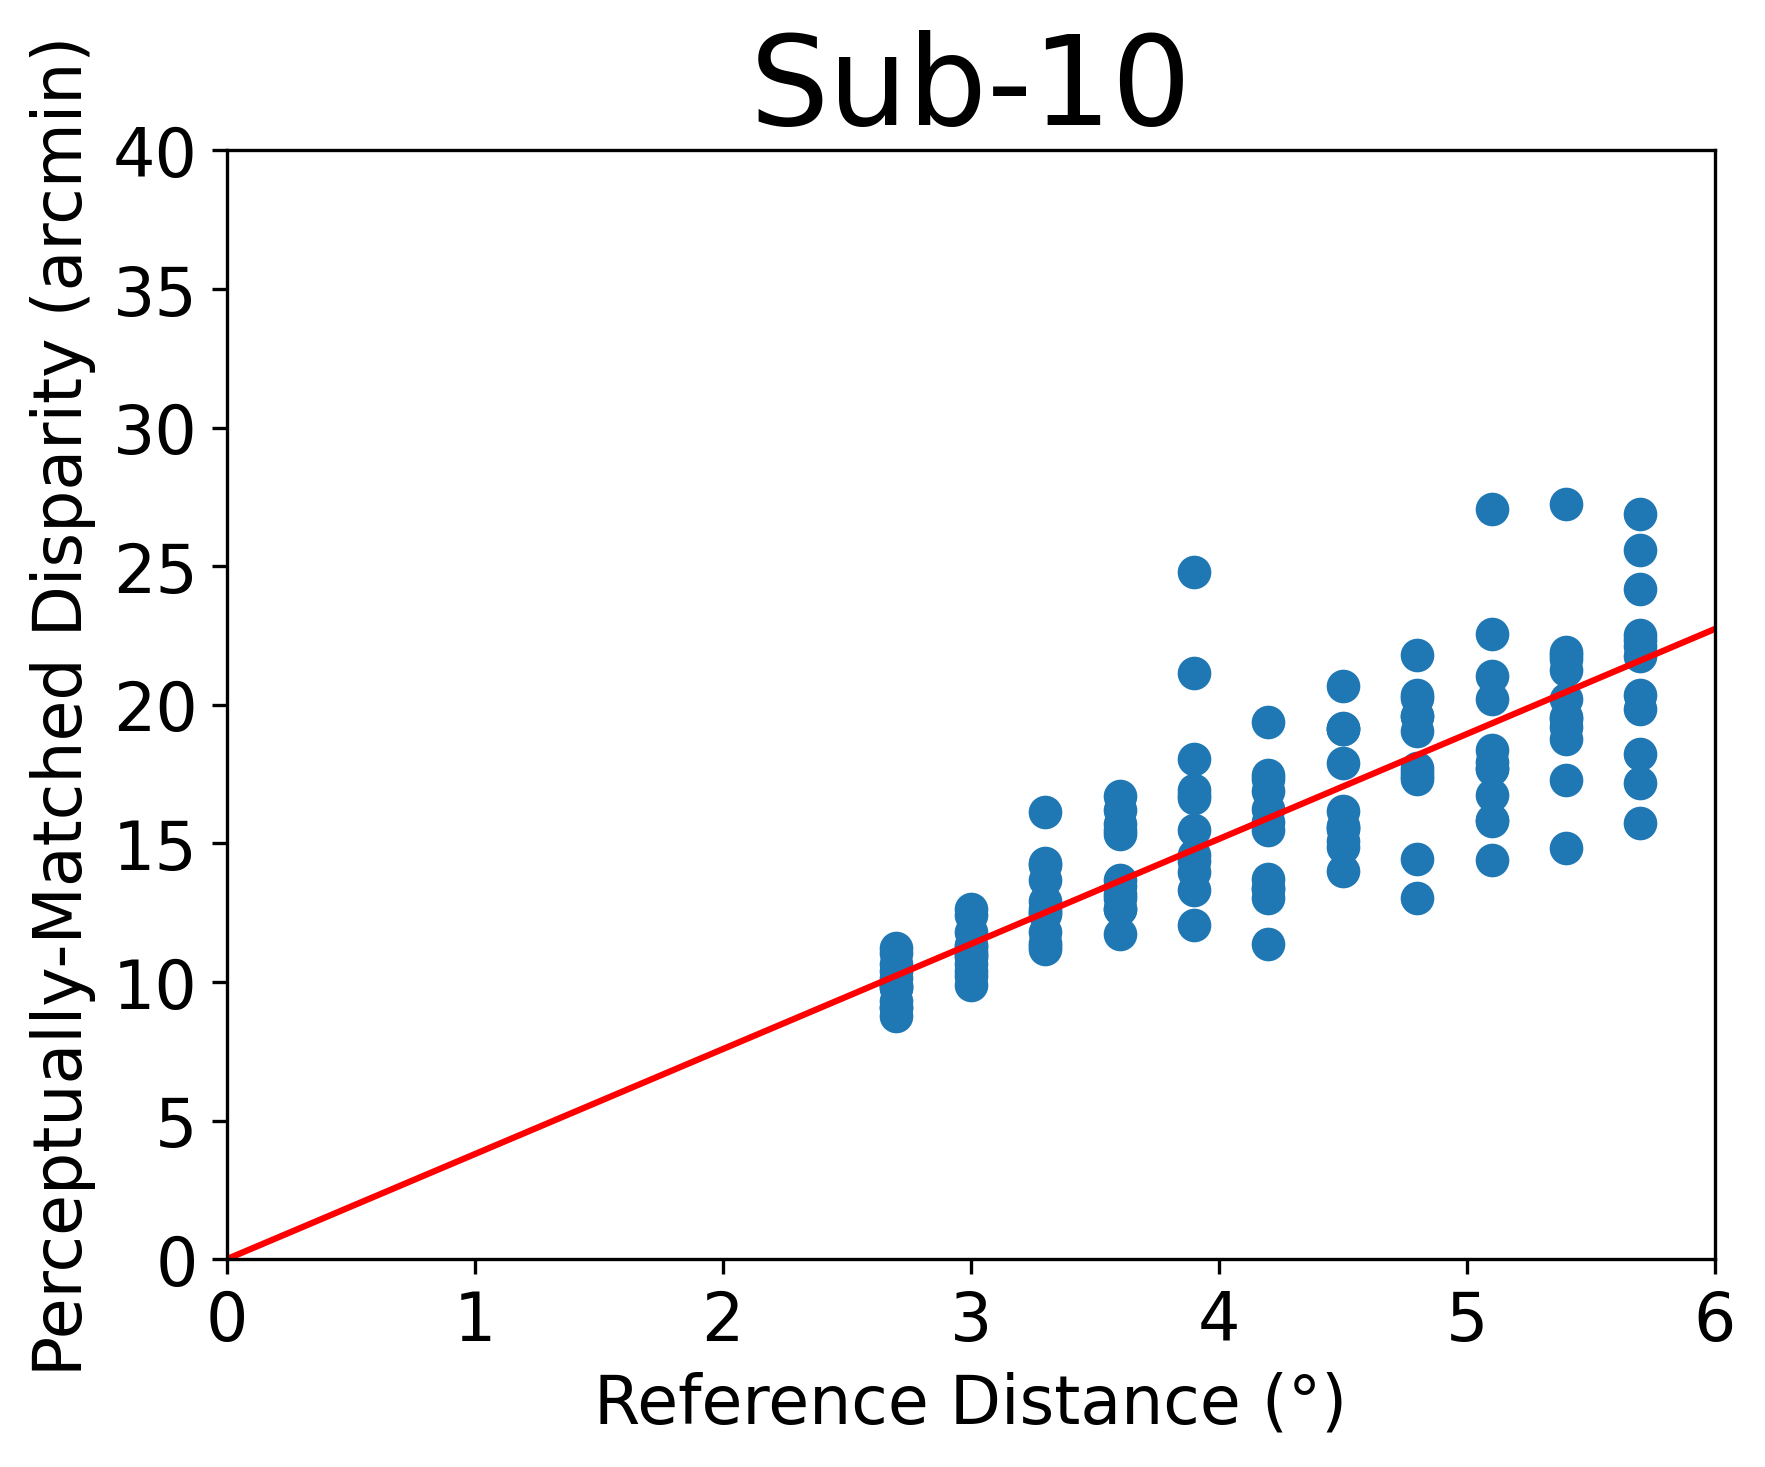

In [12]:
sub_ids = ['01', '02', '03', '04', '05',
           '06', '07', '08', '09', '10']

slopes = np.zeros([len(sub_ids)])

subi = 0
for sub_id in sub_ids:
    dist = np.zeros([132])
    dispresp = np.zeros([132])
    for i in range(2):
        data = sio.loadmat('bhv/sub'+sub_id+'/pretask3_block'+str(i+1)+'.mat')
        dist[i*66:i*66+66] = data['dist'][0]+1.2
        dispresp[i*66:i*66+66] = data['dispresponse'][0]
    
    a, _, _, _ = np.linalg.lstsq(dist[:, np.newaxis], dispresp, rcond=None)
    a = a.item()
    slopes[subi] = a
    plt.plot([0, 6], [0, a*6], color='red')
    #for i in [0.3, 2.7, 3.3, 5.7]:
    #    plt.plot([i, i], [0, a*i], '--', color='red')
    #    plt.plot([0, i], [a*i, a*i], '--', color='red')
    print('Sub - '+sub_id+':')
    print(a*np.array([0.3, 2.7, 3.3, 5.7]))
    plt.scatter(dist, dispresp, s=50)
    plt.xlabel('Reference Distance (°)', fontsize=16)
    plt.ylabel('Perceptually-Matched Disparity (arcmin)', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('Sub-'+str(subi+1).zfill(2), fontsize=30)
    plt.ylim(0, 40)
    plt.xlim(0, 6)
    plt.show()
    subi += 1

np.save('slopes.npy', slopes)